In [1]:
import numpy as np
import torch

import torchvision.datasets as datasets
import torchvision
from torch.utils.data import TensorDataset, ConcatDataset
from matplotlib import pyplot as plt


def get_random_colored_images(images, seed = 0x000000):
    np.random.seed(seed)
    
    images = 0.5*(images + 1)
    size = images.shape[0]
    colored_images = []
    hues = 360*np.random.rand(size)
    
    for V, H in zip(images, hues):
        V_min = 0
        
        a = (V - V_min)*(H%60)/60
        V_inc = a
        V_dec = V - a
        
        colored_image = torch.zeros((3, V.shape[1], V.shape[2]))
        H_i = round(H/60) % 6
        
        if H_i == 0:
            colored_image[0] = V
            colored_image[1] = V_inc
            colored_image[2] = V_min
        elif H_i == 1:
            colored_image[0] = V_dec
            colored_image[1] = V
            colored_image[2] = V_min
        elif H_i == 2:
            colored_image[0] = V_min
            colored_image[1] = V
            colored_image[2] = V_inc
        elif H_i == 3:
            colored_image[0] = V_min
            colored_image[1] = V_dec
            colored_image[2] = V
        elif H_i == 4:
            colored_image[0] = V_inc
            colored_image[1] = V_min
            colored_image[2] = V
        elif H_i == 5:
            colored_image[0] = V
            colored_image[1] = V_min
            colored_image[2] = V_dec
        
        colored_images.append(colored_image)
        
    colored_images = torch.stack(colored_images, dim = 0)
    colored_images = 2*colored_images - 1
    
    return colored_images


def load_dataset(name, path, img_size=64, batch_size=64, shuffle=True, device='cuda'):
    if name.startswith("MNIST"):
        # In case of using certain classe from the MNIST dataset you need to specify them by writing in the next format "MNIST_{digit}_{digit}_..._{digit}"
        transform = torchvision.transforms.Compose([
            torchvision.transforms.Resize((32, 32)),
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Lambda(lambda x: 2 * x - 1)
        ])
        
        dataset_name = name.split("_")[0]
        is_colored = dataset_name[-7:] == "colored"
        
        classes = [int(number) for number in name.split("_")[1:]]
        if not classes:
            classes = [i for i in range(10)]
        
        train_set = datasets.MNIST(path, train=True, transform=transform, download=True)
        test_set = datasets.MNIST(path, train=False, transform=transform, download=True)
        
        train_test = []
        
        for dataset in [train_set, test_set]:
            data = []
            labels = []
            for k in range(len(classes)):
                data.append(torch.stack(
                    [dataset[i][0] for i in range(len(dataset.targets)) if dataset.targets[i] == classes[k]],
                    dim=0
                ))
                labels += [k]*data[-1].shape[0]
            data = torch.cat(data, dim=0)
            data = data.reshape(-1, 1, 32, 32)
            labels = torch.tensor(labels)
            
            if is_colored:
                data = get_random_colored_images(data)
            
            train_test.append(TensorDataset(data, labels))
            
        train_set, test_set = train_test  
    else:
        raise Exception('Unknown dataset')
        
    return train_set, test_set

In [2]:
train_set, test_set = load_dataset(name="MNIST-colored_2", path="")

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



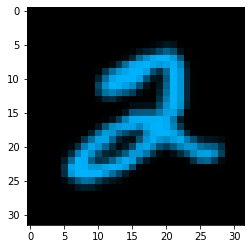

In [3]:
plt.imshow((train_set[0][0]*0.5 + 0.5).permute(1, 2, 0))

In [6]:
train_set, test_set = load_dataset(name="MNIST-colored_5", path="")

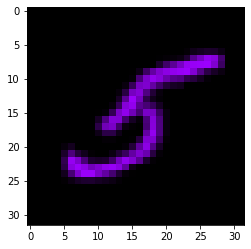

In [7]:
plt.imshow((train_set[2][0]*0.5 + 0.5).permute(1, 2, 0))